# Investigating unadjusted p-values from eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 27, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney control samples.

## Calculating analysis statistics

### Lung

In [1]:
load("data/control_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/control_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [3]:
load("data/control_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

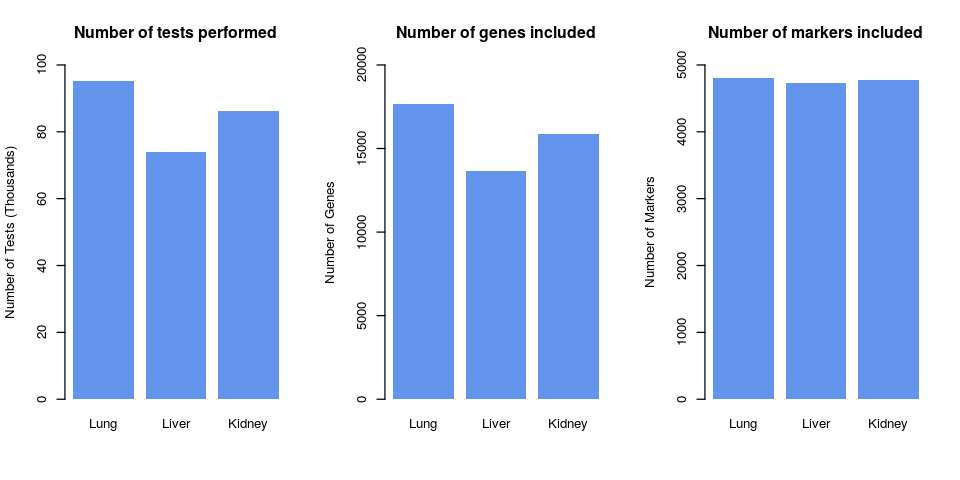

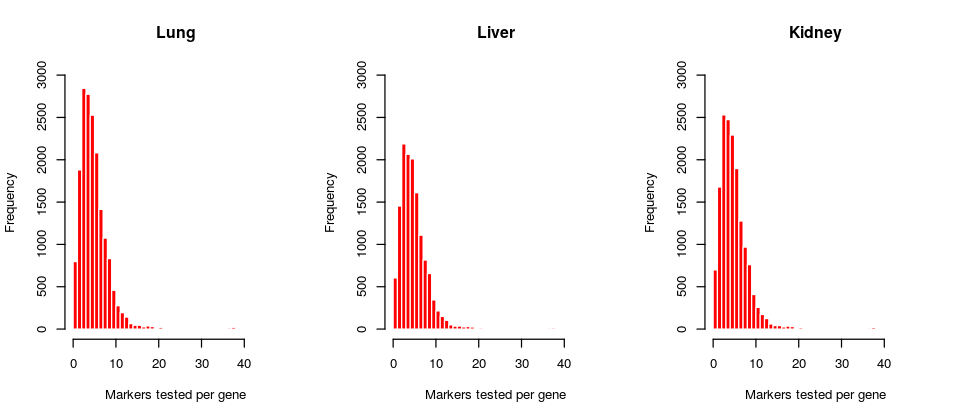

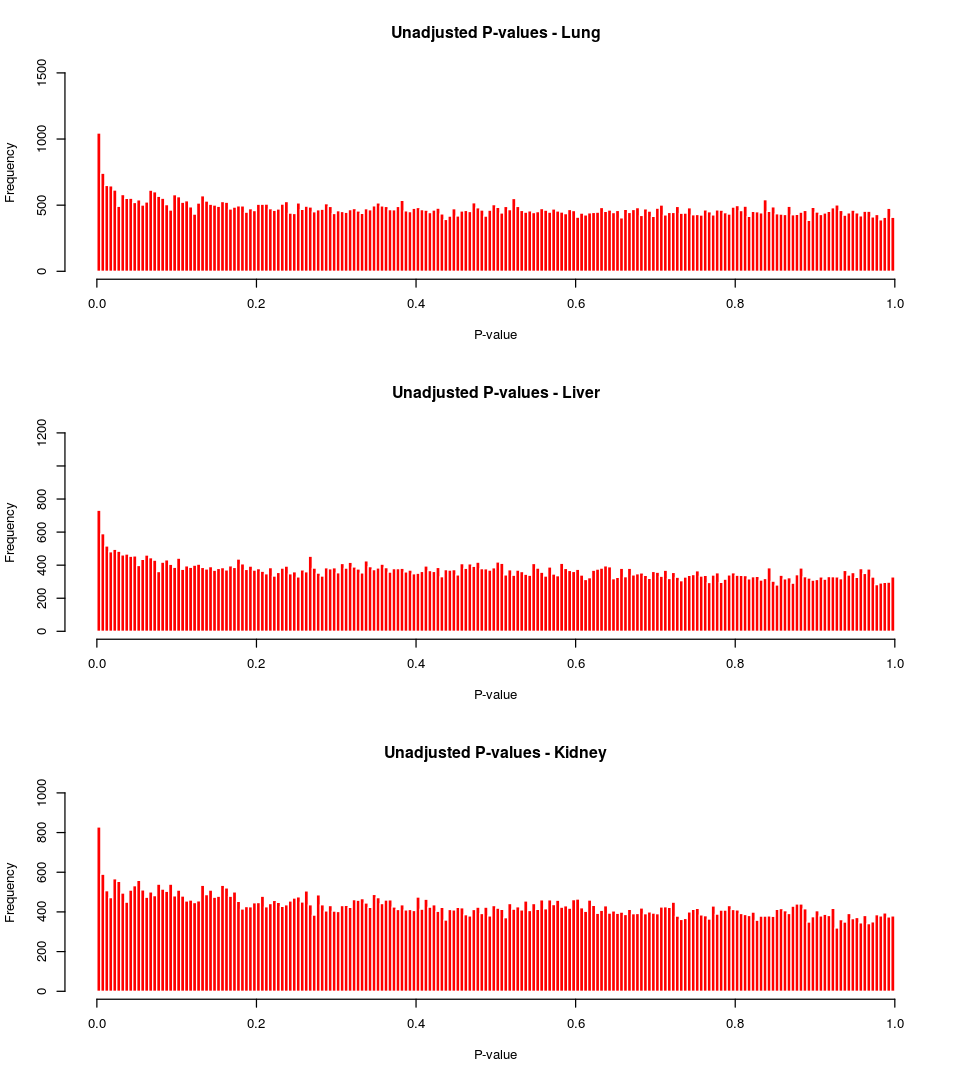

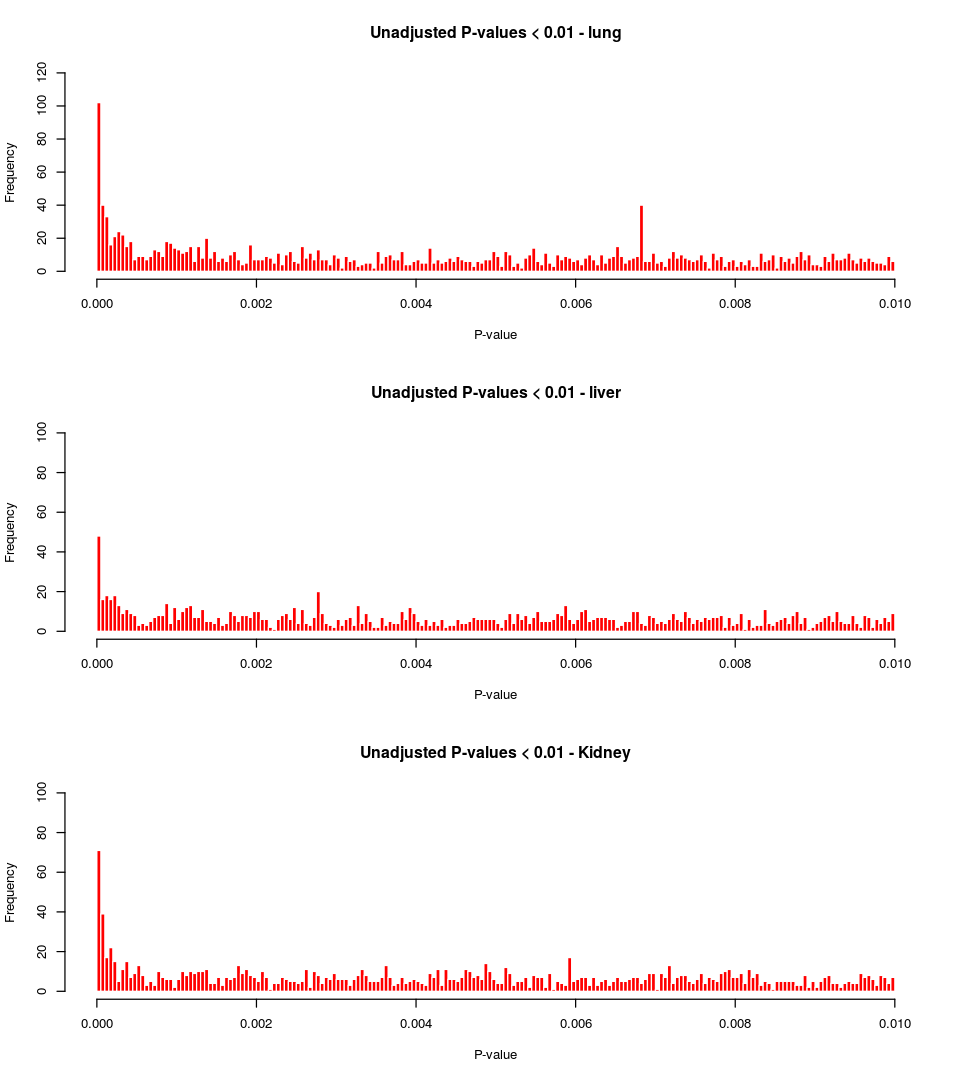

In [6]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1200), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1000), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,120), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,100), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,100), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [7]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/control_lung.Rdata")
matrix.lung <- out.mat
load("data/control_liver.Rdata")
matrix.liver <- out.mat
load("data/control_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [8]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene     Marker                         P-value             
1   AI597479 UNC533184.UNC536663            1.60923547241115e-86
2   AI597479 UNC536810.JAX00248660          1.95599446324846e-86
3   AI597479 UNC550060.UNC557806            1.5340461012975e-85 
4   AI597479 JAX00248770.UNC547234          9.19936214721594e-45
5   AI597479 JAX00248843.JAX00248843        1.04749022176736e-44
6   AI597479 UNC547351.UNC549896            1.09242243392502e-44
7   AI597479 JAX00248662.UNC541737          1.62792804326321e-44
8   Tmem147  UNC12572462.UNC12573732        7.54848242112786e-43
9   Sdhaf1   UNC12572462.UNC12573732        5.6929285600082e-40 
10  Sema4c   JAX00002582.UNC474632          1.14806172773374e-21
11  Gapdhs   UNC12572462.UNC12573732        7.82043588392283e-21
12  Gm3414   UNC9076911.UNC9083687          1.99334792215126e-20
13  Syne4    UNC12572462.UNC12573732        5.90660690117426e-20
14  Srpk2    UNC8769425.UNC8791233          3.86830688685231e-13
15  Bzw1     UNC718116.UNC734946            4.97673300130524e-12
16  Zbtb49   UNC8990872.UNC8994596          1.69520637132694e-11
17  Dnah7c   UNC578793.UNC597735            5.24603138485185e-11
18  Ptpn12   UNC8769425.UNC8791233          1.89888779546676e-10
19  Ptpn12   UNC8760878.UNC8769129          2.12043773190528e-10
20  Ptpn12   UNC8744830.UNC8757015          2.69273622519933e-10
21  Ptpn12   UNC8757558.UNC8760307          2.88076535524945e-10
22  Mia      UNC12521377.UNC12521377        5.54970144243379e-10
23  Fam126b  UNC718116.UNC734946            6.05196655857341e-10
24  C1qtnf7  UNC9053052.JAX00580480         8.35736597028235e-10
25  C1qtnf7  UNC9060026.UNC9064193          8.81676446017387e-10
26  C1qtnf7  UNC9041493.UNC9052705          8.96151745475626e-10
27  Paf1     UNC12549403.UNC12567534        1.11198627486273e-09
28  Paf1     UNC12543724.UNC12548710        1.33675445795906e-09
29  Paf1     UNC12542093.UNC12543129        1.49093392702023e-09
30  Paf1     UNC12543518.UNC12543518        1.52950381679218e-09
⋮   ⋮        ⋮                              ⋮                   
71  Timm50   UNC12543518.UNC12543518        1.60035557872913e-05
72  Olfr172  UNC26908820.UNC26909630        1.70268053746534e-05
73  Timm50   UNC12549403.UNC12567534        1.73065509787227e-05
74  Tpp2     UNC550060.UNC557806            1.83422099280496e-05
75  Tpp2     JAX00249009.UNC577593          1.85123506756178e-05
76  Nhlrc1   UNC22553195.UNC22578692        1.91685600804229e-05
77  Timm50   UNC12543724.UNC12548710        1.94301446216365e-05
78  Tpp2     JAX00248843.JAX00248843        1.96119933873444e-05
79  Tpp2     UNC547351.UNC549896            2.00312934881052e-05
80  Tpp2     JAX00248770.UNC547234          2.10816283251045e-05
81  Gm10046  UNC12542093.UNC12543129        2.46523116142968e-05
82  Stx5a    UNC29871907.JAX00470016        2.5605478704816e-05 
83  Gm10046  UNC12543518.UNC12543518        2.71187585008529e-05
84  Sepsecs  UNC9194356.JAX00582642         3.09223480264455e-05
85  Nemp1    UNC18963682.JAX00302406        3.13321644489619e-05
86  Sepsecs  UNC9178955.JAX00582322         3.14497480579962e-05
87  Nemp1    UNC18954707.UNC18961845        3.22253577501763e-05
88  Nemp1    UNC18970636.UNC101328991       3.26848412624575e-05
89  Nemp1    JAX00302230.UNC18963675        3.43879498827735e-05
90  Sepsecs  UNC9178217.UNC9178793          3.45576113679925e-05
91  Stx5a    UNC29871593.UNC29871593        3.45871882797052e-05
92  Psap     UNC18034355.JAX00290458        3.59645222744974e-05
93  Lcorl    UNC9084229.JAX00129566         3.71231146162393e-05
94  Psap     UNC18049832.JAX00290510        3.78858230461817e-05
95  Sep15    UNC6433748.UNC6436844          3.83081065293223e-05
96  Psap     UNC18055450.JAX00018577        3.89025222108779e-05
97  Stx5a    UNC29871426.UNC29871426        4.0227362741449e-05 
98  AK010878 UNC21772991.backupUNC120219860 4.04193224462748e-05
99  Fxyd3    UNC12572462.UNC12573732        4.42293604125805e-05
100 Stx5a    UNC29871338.UNC29871338   

Liver


Gene     Marker                        P-value             
1   Wdr1     UNC8995230.UNC9018866         5.44252620907625e-12
2   Grhl1    JAX00327915.JAX00327915       1.87997988930282e-10
3   Ankrd44  UNC699866.JAX00003956         1.57830278097855e-09
4   Haghl    UNC27706510.UNC27714988       2.40559551736471e-09
5   Haghl    UNC27715265.UNC27718914       2.44028200409229e-09
6   Cklf     UNC15401027.JAX00679070       4.79969632034493e-09
7   Cklf     UNC15417874.UNC15422538       6.47681366571718e-09
8   Cklf     UNC15416961.JAX00679081       6.54761755968817e-09
9   Cklf     UNC15422872.UNC15444168       7.73277048940551e-09
10  G6pc2    UNC3274971.UNC3298947         4.59091120629118e-08
11  Grhl1    UNC20742271.JAX00199937       4.86181720730034e-08
12  Npr1     UNC5732520.UNC5752814         9.44911870666203e-08
13  Haghl    UNC27694572.JAX00434363       1.0860966083045e-07 
14  Haghl    UNC170299097.UNC27694074      1.54919157745289e-07
15  Hist1h1e UNC22234794.UNC22263112       5.64128943197064e-07
16  Hist1h1e UNC22263703.UNC22267580       6.28931487354382e-07
17  Grhl1    JAX00327082.JAX00327882       1.92570215658151e-06
18  Nfil3    JAX00357912.JAX00357963       1.98764408548436e-06
19  G6pc2    UNC3268533.JAX00095547        2.84769764520558e-06
20  Nfil3    UNC22578796.UNC22595965       3.14288297904845e-06
21  G6pc2    UNC3274478.UNC3274700         4.90142323022314e-06
22  Gtf3c4   UNC2788440.UNC2804046         4.91507185066026e-06
23  Abhd13   UNC14155073.UNC14155073       5.11320816785424e-06
24  Gtf3c4   UNC2783477.UNC2788235         5.44504663803004e-06
25  Abhd13   JAX00158787.UNC14154785       6.17215582554532e-06
26  G6pc2    UNC3271429.UNC3273914         6.87591980575423e-06
27  Ints3    UNC5732520.UNC5752814         7.22333815749624e-06
28  Clk1     UNC738685.UNC739718           8.93584000303784e-06
29  Clk1     JAX00252106.UNC741530         9.06703986122595e-06
30  Abhd13   UNC14124729.UNC14147606       9.25935238912524e-06
⋮   ⋮        ⋮                             ⋮                   
71  Hsp90b1  JAX00294363.UNC18356578       0.000127915351551299
72  Nr1d1    UNC20229820.UNC20233664       0.000136828393384105
73  Fuca1    UNC8299912.UNC8299912         0.00013792312719623 
74  Snora17  UNC2774912.JAX00485829        0.00013966054955184 
75  Fuca1    UNC8300204.UNC8301426         0.000140170071621274
76  Snora17  UNC2778287.UNC2783098         0.00014086048172434 
77  Thra     UNC20234075.UNC20234075       0.000141016847461925
78  Thra     UNC20229820.UNC20233664       0.000141090406608726
79  Thra     UNC20220061.JAX00319724       0.000143087980132681
80  Nr1d1    UNC20208047.UNC20210453       0.000143291657438484
81  Thra     UNC20219482.UNC20219482       0.000144642243914692
82  Grhl1    UNC20742915.UNC20748671       0.000145475925941794
83  Thra     JAX00319556.UNC20219195       0.000151741952728913
84  Mir3473g UNC3932612.UNC3936541         0.000162969889583776
85  Mir3473g UNC3930995.UNC3932319         0.000162969889603933
86  Mir3473g UNC020188428.UNC020188428     0.00016296988984997 
87  Dnmt3b   UNC4267378.UNC4298342         0.0001639055548373  
88  Fuca1    UNC8302213.UNC8307036         0.000172012876085781
89  Rrnad1   UNC5732520.UNC5752814         0.000172188305329375
90  Hsp90b1  UNC18356716.UNC18357001       0.000173805437881503
91  Nr1d1    UNC20220061.JAX00319724       0.000178364895791734
92  Nr1d1    B6_11_097849250_S.UNC20216486 0.000184376843160512
93  Mir3473g UNC3927435.UNC3930347         0.000186447043607424
94  Nr1d1    UNC20219482.UNC20219482       0.000188083192308096
95  Nr1d1    JAX00319541.UNC20218289       0.000192813180296877
96  Nr1d1    JAX00319556.UNC20219195       0.000196629000964772
97  Fuca1    JAX00567771.UNC8299233        0.00019857435940441 
98  Ncoa7    UNC17683151.UNC17688499       0.000198797872647586
99  Ttyh1    UNC070002187.JAX00190001      0.000209139590792437
100 Ttyh1    UNC12373496.UNC12373496       0.000209139726110161

Kidney


Gene          Marker                         P-value             
1   Pmel          UNC18963682.JAX00302406        5.41553709413878e-12
2   Pmel          JAX00302230.UNC18963675        5.52427671342486e-12
3   Pmel          UNC18970636.UNC101328991       8.06082019426515e-12
4   Pmel          JAX00302462.JAX00302527        8.17258312686646e-12
5   Pmel          UNC18980143.UNC18983661        9.45570077004762e-12
6   Cux1          UNC10243742.UNC10244171        2.31233598004693e-11
7   Fam78a        UNC2843756.UNC2845489          3.27143668497692e-08
8   Siae          UNC16177202.UNC16189957        4.20522532861421e-08
9   Siae          UNC16190786.JAX00691017        4.43332974792982e-08
10  Fam78a        JAX00486759.UNC2842985         6.55767298783007e-08
11  Get4          UNC10291007.UNC10306321        1.04339261512415e-07
12  Fam78a        JAX00486705.UNC2842526         1.17888797778197e-07
13  Fam78a        UNC2837330.UNC2838381          1.19872951027411e-07
14  Fam78a        UNC2824282.UNC021013288        1.21172396866399e-07
15  Gtf2f1        UNC28065431.UNC28072598        1.4671508075543e-07 
16  Siae          UNC16167936.UNC16176492        1.68764630381719e-07
17  Gm527         UNC21287287.UNC21302151        3.14363487435701e-07
18  Cys1          JAX00328078.UNC20759206        3.21646104548489e-07
19  Gtf2f1        UNC170254792.JAX00442513       3.91292816167605e-07
20  Siae          UNC16155946.JAX00690419        5.23581539681243e-07
21  Pde10a        UNC27534981.UNC27536218        8.65180831417602e-07
22  Ssr4          UNC30955632.UNC30964860        1.99759054536105e-06
23  Mir6399       UNC8323552.UNC8325248          2.0913040242085e-06 
24  Fam19a5       UNC26040510.UNC26042016        4.20443963245084e-06
25  Exosc3        UNC7171512.UNC7178019          4.25132409732165e-06
26  Fam49a        UNC20624337.UNC20639168        4.37881992809436e-06
27  2310069B03Rik JAX00615510.UNC11497618        4.50327132458201e-06
28  2310069B03Rik UNC11498802.UNC11507375        4.53963020641631e-06
29  Npcd          UNC25943263.UNC25949424        4.60304355500192e-06
30  Exosc3        UNC7170328.JAX00549865         4.67517668557988e-06
⋮   ⋮             ⋮                              ⋮                   
71  Capn7         UNC23798735.UNC23812618        4.97844167448295e-05
72  B2m           UNC020174288.UNC020174288      5.02568495147869e-05
73  B2m           UNC3842618.UNC3869677          5.02577879966229e-05
74  B2m           UNC3870640.JAX00502183         5.07298259869963e-05
75  Lepr          JAX00559813.JAX00559813        5.07550574365661e-05
76  Bcl7a         UNC10063577.JAX00595174        5.28683316169851e-05
77  Capn7         JAX00376591.UNC23798374        5.42966988334996e-05
78  Bcl7a         UNC10052841.UNC10061728        5.48172592022882e-05
79  Gm14288       UNC4556542.UNC4558476          5.49764209703055e-05
80  Capn7         UNC23788140.UNC23792603        6.0735683990631e-05 
81  Fam19a5       JAX00064686.UNC26057169        6.11515818728229e-05
82  Gla           UNC31348015.backupUNC200692256 6.22060441132129e-05
83  Gla           UNC31339434.UNC31340189        6.31849253914447e-05
84  Plpp5         JAX00663556.UNC14333584        6.32397934276621e-05
85  Gla           UNC31346472.UNC31347593        6.47688055160813e-05
86  Nrp2          UNC790025.UNC791840            6.48373006435853e-05
87  Plpp5         UNC14334524.UNC14334524        6.58266969927728e-05
88  Plpp5         UNC14334951.JAX00159821        6.60293281147886e-05
89  Plpp5         UNC14337122.UNC14337122        6.62321770565289e-05
90  Plpp5         UNC14337730.UNC14337730        6.63135108106349e-05
91  Plpp5         UNC14338157.UNC14338157        6.63949640126328e-05
92  Plpp5         JAX00663607.JAX00663607        6.64765371508029e-05
93  Plpp5         UNC14338945.UNC14340808        6.67242343967695e-05
94  Capn7         UNC23782743.UNC23787821        6.76786605871212e-05
95  Gla           UNC31344134.JAX00719373        6.79700839828828e-05
96  Capn7     